# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:
- The Smartcab does not move at all, irrespective of what color the traffic light is or the traffic conditions.
- Initially, the Smartcab is stopped at a red light and it receives positive rewards as expected. However, when the light turns green and it still remains stationary, it begins to receive negative rewards. When the light turns red again, the rewards become positive. This pattern repeats as the simulation continues to run.
- Since the Smartcab is stalled at the intersection and does not move at all, when the light turns green the rewards turn negative and when it turns red the rewards become positive.
**

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:
- In the agent.py Python file, three flags that can be set are : 
    1. learning: It decides if the agent will be forced to learn using Q-learning or not; It is set to False by default, so it doesn't force the Smartcab to learn by Q-learning. It has 2 parameters, namely epsilon and alpha, which are the exploration factors and learning rate, respectively.
    2. enforce_deadline: It coerces the agent's transition/movement by introducing a deadline metric that removes an infinite time horizon. It is currently set to False, so the agent has an infinite time horizon to reach it's goal.
    3. display: This flag enables the visual simulation that PyGame GUI provides if set to True, but is not expected to change the simulation outcome except not display the GUI. The default value of this flag is set to True.

- In the environment.py Python file, the 'act()' function is the Environment class function that is called when an agent performs an action.

- In the simulator.py Python file, it seems that both 'render_text()' and 'render()' functions perform a common action of displaying the simulation's current state at each step, but with a small difference. The difference is that the 'render_text()' function displays the simulation's current state in a Non-GUI text format that can be scrolled to read past status information, while the 'render()' function displays the same in a GUI format via the Python PyGame module which is updated to reflect the real time state of the simulation.

- In the planner.py Python file, it appears that the 'next_waypoint()' function first considers the East-West direction and then North-South direction.
**

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


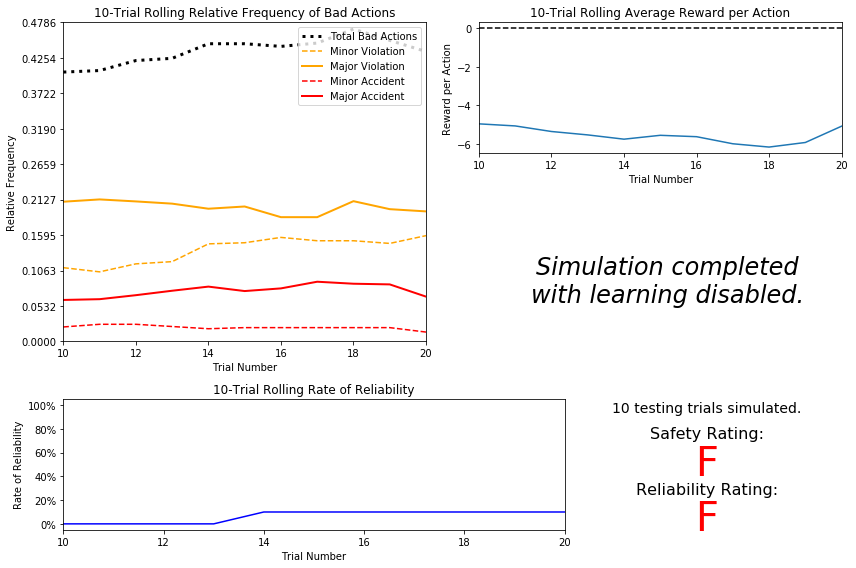

In [3]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:
- The driving agent is making bad decisions with increasing frequency as can be seen from the 10 trial rolling relative frequency visual. The percentage of total bad actions steadily increases from about 40% to about 45%.
- Considering that the agent is driving randomly, the reliability rating of about 15-17% makes complete sense.
- Initially the reqards are negative and progressively increase from -5 to -6 at about the 18th trial after which they decrease back to about -5. This could be correlated with the slight spike in major accidents and minor violations, both of which reduce after trial number 18. The rewards do not suggest that it has been heavily penalized, since major accidents and major violations are still about 6% and 21% respectively.
- The rolling rate of relaibility stays constant at 0% until the 13th trial, post which it increases to about 15%. On the other hand the total number of bad actions consistently increases as the number of trials increases significantly by about 9-10%.
- The Smartcab cannot be considered safe at this moment since the major accidents are still over 5% and the major violations are over 21%. As far as reliable, the Smartcab is neither reliable since it is late for about 85% of the time.
**

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer: CHOSEN FEATURES:
1. waypoint - This feature is important since it is necessary for the agent to know in which direction to head to get closer to the destination.

2. inputs::light - The color of the traffic light is definitely important since it will teach the agent that it receives a negative reward for stopping at a grenn light as well as for driving through a red light. this will definitely allow it to learn.

3. inputs::left - The agent needs to know if there is a vehicle to it's left and in which direction the vehicle to it's left intends to turn. This is useful in a red light situation wherein the agent can make a right turn if there isn't a vehicle to it's left but should not turn right if there is a vehicle to it's left. Hence, the agent becomes efficient by not waiting unnecessarily at a red signal if wants to turn right and there are no cars to it's left. This is assuming that a  right turn at a red signal is allowed

4. inputs::oncoming - This feature is also important since the agent needs to know if there is an oncoming car and in which direction it intends to turn. This is vital when the agent wants to turn left on a green signal so as to avoid turning into oncoming traffic and getting into an accident.

5. inputs::right - It doesn't help to know if there is a vehicle to the agent's right since it doesn't affect the agent's decision to move in any direction at either a green light or to turn right at a red light. Hence, this input is not very significant. However, I will still consider it since having top notch Safety is a primary concern for me.

- I decided to ignore the deadline feature for the following reason:
    1. deadlines - This comes down more to domain knowledge than to feature importance. Since we are talking about a vehicle deciding what to do at intersections in a world which has many other agents, putting the pressure to meet a deadline by reducing number of steps and breaking a traffic law would be deragatory to the Safety aspect of the Smartcab. Hence, I would not reccomend including the deadline feature.
**

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer
Each feature and it's possible values are written below for easy summarization: -
1. waypoint - It has 3 possible values ['left','right','forward']
2. inputs::left - It has 4 possible values ['None','left','right','forward']
3. inputs::oncoming - It has 4 possible values ['None','left','right','forward']
4. inputs::right - It has 4 possible values ['None','left','right','forward']
5. inputs::light - inputs::left - It has 2 possible values ['Green','Red']

Based on these features the total possible number of states can be calculated as :- #States = 3x4x4x4x2 = 384 states

384 states, in my opinion, is manageable and it should be possible for the driving agent to learn a policy for each of these 384 states within a reasonable number of training trials.

:**

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

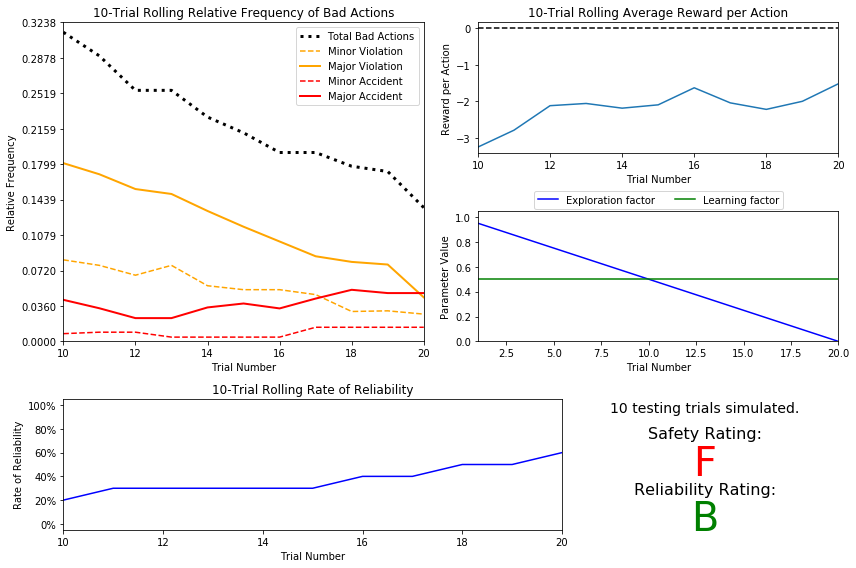

In [8]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:
1. There do not seem to be any similarities between the basic driving agent and the default Q-Learning agent. The percentage of major accidents, minor accidents, minor violations and major violations all reduced. The overall percentage of bad actions reduced from 32% to 14%.

2. The driving agent took 20 training trials before the Q-Learning agent started testing. This number makes sense given that the epsilon tolerance was 0.05 for each training trial. Since epsilon was reduced by 0.05 in each trial that is, 1.0 - (20 x 0.05) = 0.0 < 0.05. hence, it makes sense for 20 training trials given the epsilon tolerance we selected.

3. Yes! The decaying function implemented for ϵ (the exploration factor) is accurately represented in the parameters panel.

4. Yes! As the number of training trials increased, the percentage of bad actions dropped from 32% to 14% while the average reward increased by a small amount.

5. The Smartcab is definitely more reliable since the reliability percentage increased from 20% to 60%. The percentage of all bad actions does drop a bit but is still significantly large. This is seen in it's 'F' Safety rating. On the other hand the Smartcab is now on time about 60% of the time with it's reliability rating increasing from 'F' to 'B'.
**

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

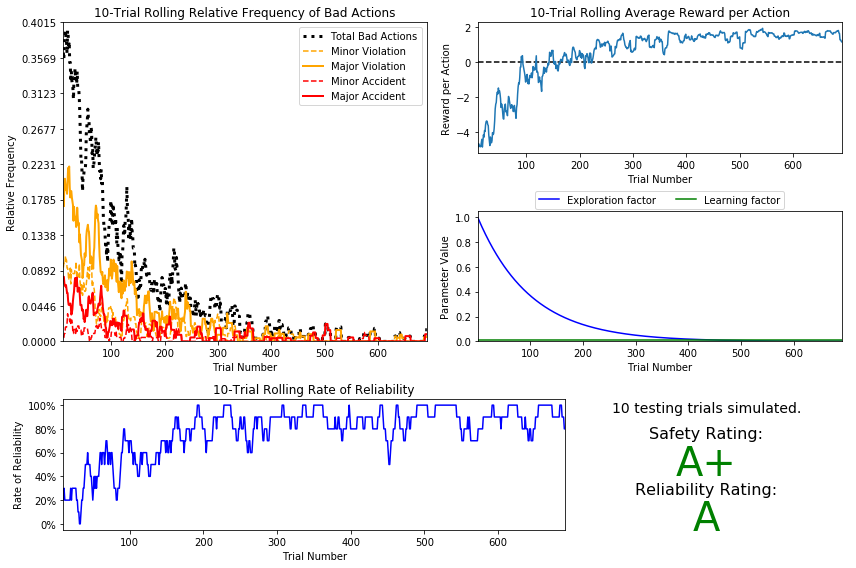

In [2]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:
1. I used the decaying function:- ϵ = e^-(at) , for 0<a<1
   tolerance = 0.001
   alpha = 0.01
   n_test = 10

2. There were around 600~700 training trials done before testing was started.

3. After multiple iterations with different types of decaying functions and different values for epsilon-tolerance and alpha, I arrived at the final values of tolerance = 0.001 and alpha 0.01 since they gave the best reliability and saftey ratings of A and A+ respectively.

4. Compared to the default Q-Learner in the previous section this improved Q-Learner has definitely given improved results. The Safety Rating has increased from 'F' to 'A+' which is excellent. The Reliability has also increased from 60% to 99% as a result if which the Reliability rating increased from 'B' to 'A'. 

5. Considering, that the Smartcab has achieved Safety and Reliability ratings of 'A+' and 'A' I would concur that based on the Q-Learners results, the agent has successfully learned an appropriate policy.

6. Yes, I am satisfied with the safety rating. I still beleive that, given more time or explorations of decaying functions, tolerance and alpha values, it might be possible to push the Reliability rating from 'A' to an 'A+'.
** 

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:
My state space is defined based on the following state dictionary {waypoint, light, left, right, oncoming}. Refer to this format for every state space mentioned in the following discussion.

The expected optimal policy for the algorithm should have a few essential features:

1. Any movement at a red light should be given the largest negative penalty. This would ensure that the driving agent has learnt the core traffic rule of which traffic light to stop at and which one to move at.
    - when the driving agent is in a state {forward, 'red', forward, forward, None}, it shoud have a max Q action as None.
    - By incorporating the left input, the agent will learn to not move when it is in the state (right, 'red' , forward, forward, None). This enforces that it learns to wait at a red signal when it wants to turn right but there is a vehicle on it's left moving forward. At the same time when there isn't a vehicle to it's left, it will take the right turn thus saving time and improving Reliability.

2. Similarly almost all of the states having 'green' light should enforce movement on the driving agent, but ofcourse given certain conditions are satisfied. These are:- 
    - if the oncoming traffic is in a direction like left which will cause a collision, then movement should be stopped. This would be representative of a state (forward,'green',None, None, left). In this manner, the agent learns the left turn rule.
    - The state having no oncoming traffic, generalized as (forward, 'green', '__', '__', None) should have the highest Q state for either forward, left or right movement.
    - If the oncoming traffic is in the same direction as the agent's waypoint, the waypoint direction should be given preference. for eg. the agent in a state (forward, green, None, None, forward) should get a positive reward for going forward while if the agent is in a state (left, green, None, None,right) it should get a large negative penalty if it makes the left turn since this would result in a collision.

3. We can determine that these policies have been learnt by viewing the "sim_improved-learning.txt" file. Here are some examples of situations in which the agent has learnt the optimal policies as well as situations in which it hasn't learnt an optimal policy but has instead learnt a sub-optimal policy with a view to increase efficiency.

Situation 1: Right turn at red signal (Optimal Policy learnt)
    ('right', 'red', None, 'left', 'left')
     -- forward : -0.11
     -- right : 0.34
     -- None : 0.02
     -- left : 0.00
Here we can see that the agent has learnt the optimal policy of the right turn at a red signal. It is at a red signal and wants to turn right, there is no vehicle to it's left and the vehicles to it's right and in the oncoming direction both turn left as a result of which there is 0 chance of a collision if it turns right. As a result the right action has the maximum Q-value and it takes the right turn. this is iopposed to a situation like the one below: 
    ('right', 'red', 'forward', 'right', 'left')
     -- forward : 0.00
     -- right : 0.00
     -- None : 0.02
     -- left : -0.39
In this state since the vehicle to the left want's to move forward, the maximum Q-value is given to None since a right turn by the agent could cause a collision.


Situation 2: Left turn rule (Optimal Policy not Learnt)
The left turn rule teaches the agent to give way to oncoming traffic turning left when it wants to go forward OR to give way to oncoming traffic going forward when it wants to turn left. Any other movement from vehicles to it's left or right should not be given weightage since their traffic light would be red. This prevents any chance of a collision. Based on the logs it appears that rather than staying put and wasting time, the agent has learnt to make a right turn in this situation.
    ('left', 'green', 'left', None, 'left')
     -- forward : 0.30
     -- right : 0.00
     -- None : -0.04
     -- left : 0.01
It appears that the agent has not learnt this policy too well in this state since the oncoming traffic wants to turn left and a left turn or forward movement could result in a collision. Yet both forward and left movement have been given positive rewards. This could be because this feature space was not exlplored during the training trials and was encountered directly in the testing trial. This would cause the agent to learn this policy in an incorrect manner and then perform the same action in any future occurence of this feature state.


Situation 3: Not following the required waypoint.(Sub-Optimal policy learnt)
    ('left', 'green', 'right', 'forward', 'forward')
     -- forward : 0.01
     -- right : 0.00
     -- None : -0.06
     -- left : 0.00
 Here again we can see that the agent want to go left at a green light. The vehicle to it's left goes right, the vehicle to it's right goes forward and the oncoming vehicle also goes forward. The agent decides to go forward instead of left, because it would rather not wait for the oncoming vehicle to pass. This is shows that the agent is learning a sub optimla policy wherein it decides to take another route to find the balance between saving time and preventing a collision.
 

** 




-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:
When we look at the Smartcab itself, it is never given information about where exactly it's destination is. It is simply provided with the next direction it should take in order to get to it's destination. As a result, even if future rewards for a particular route are given, the Smartcab itself is unable to determine which route is the best due to this lack of information; that is to say that it can only make a decision about the next state it will move to. Hence, providing future rewards for a series of successive states in order to coax the Smartcab towards choosing the best route would be futile.

As far as the environment is concerned, in this particular problem, the destination of the Smartcab changes with each trial. So even if the Smartcab was able to learn the best route (say 'route A') using future rewards, that route might be the worst possible for the destinations in subsequent trials, but the Smartcab would still take 'route A' because the future rewards taught it  that that route was the best in the previous trial.

Another potential issue could be that the positive future rewards awarded at each state could nullify the effect of negative rewards and cause the Smartcab to learn bad actions as good ones instead. This would not happen at each and every state, but even a couple of bad actions learned as good actions coould possibly affect the Smartcabs Safety or Reliability in a negative manner.
**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.